<a href="https://colab.research.google.com/github/krimoe/Bank-marketing-campaigns-Deep-learning/blob/main/Bank_(marketing_campaigns).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The classification goal is to predict if the client will subscribe to a term deposit 

In [ ]:
!pip install keras

import itertools

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import random as rn

import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/bank.csv') 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
np.random.seed(0)

In [ ]:
sns.set(style='white', context='notebook', palette='deep')

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
print('Duplicate values in the bank-full dataset are: ', data.duplicated().sum())


Duplicate values in the bank-full dataset are:  0


In [ ]:
#data.drop_duplicates(inplace=True)

In [ ]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [ ]:
print(data.isnull().sum().sum())

0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


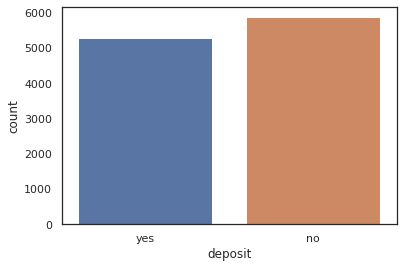

In [ ]:
sns.countplot('deposit',data=data) #voir si ma data est équilibrée

on remarque que ma data est relativement bien équilibrée, il n'y a pas une grande disparité entre les deux classes, on aura donc un split homogène

In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
object_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
data.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [ ]:
data.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [ ]:
data.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [ ]:
data.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [ ]:
data.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [ ]:
data.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [ ]:
data.month.value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [ ]:
data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [ ]:
data.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

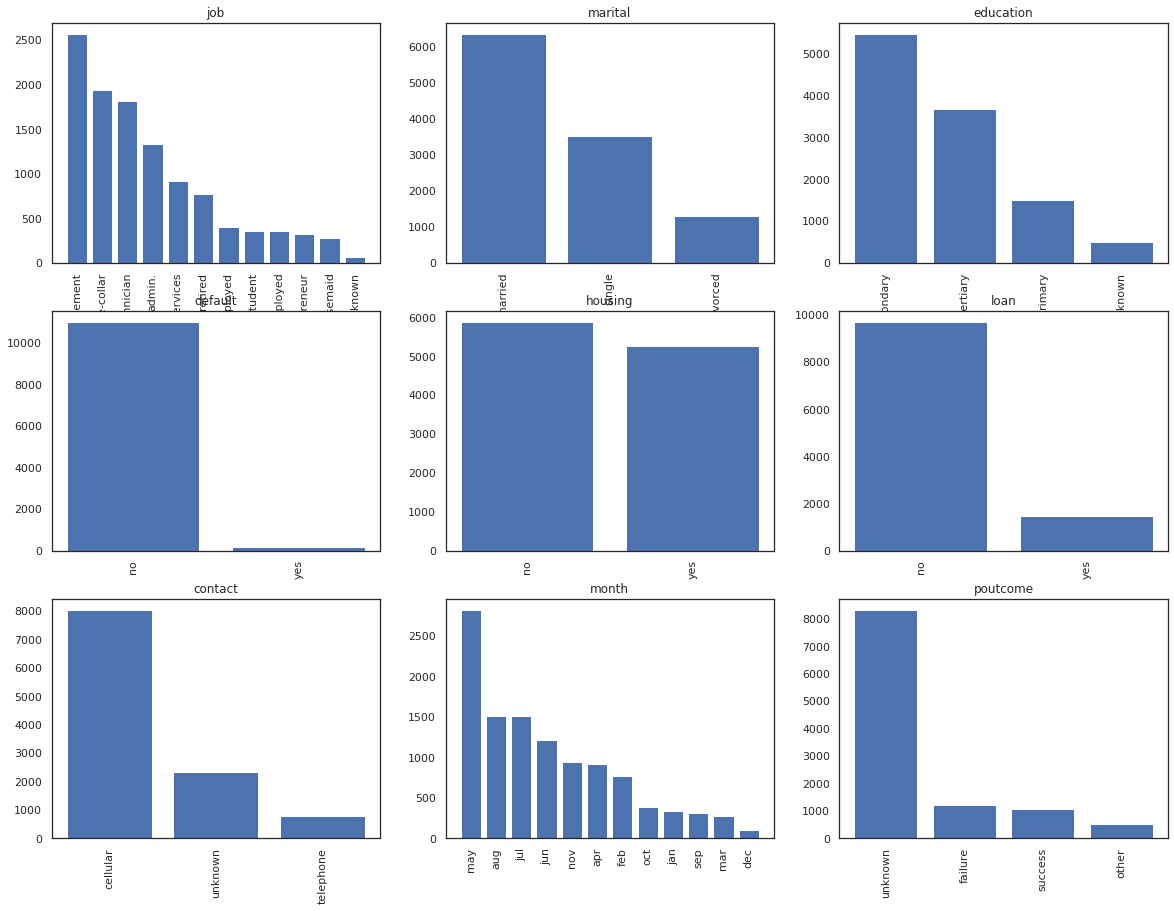

In [ ]:
#visualisation of categorical columns
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

In [ ]:
numerical_columns = data.select_dtypes(include=['int64']).columns
numerical_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

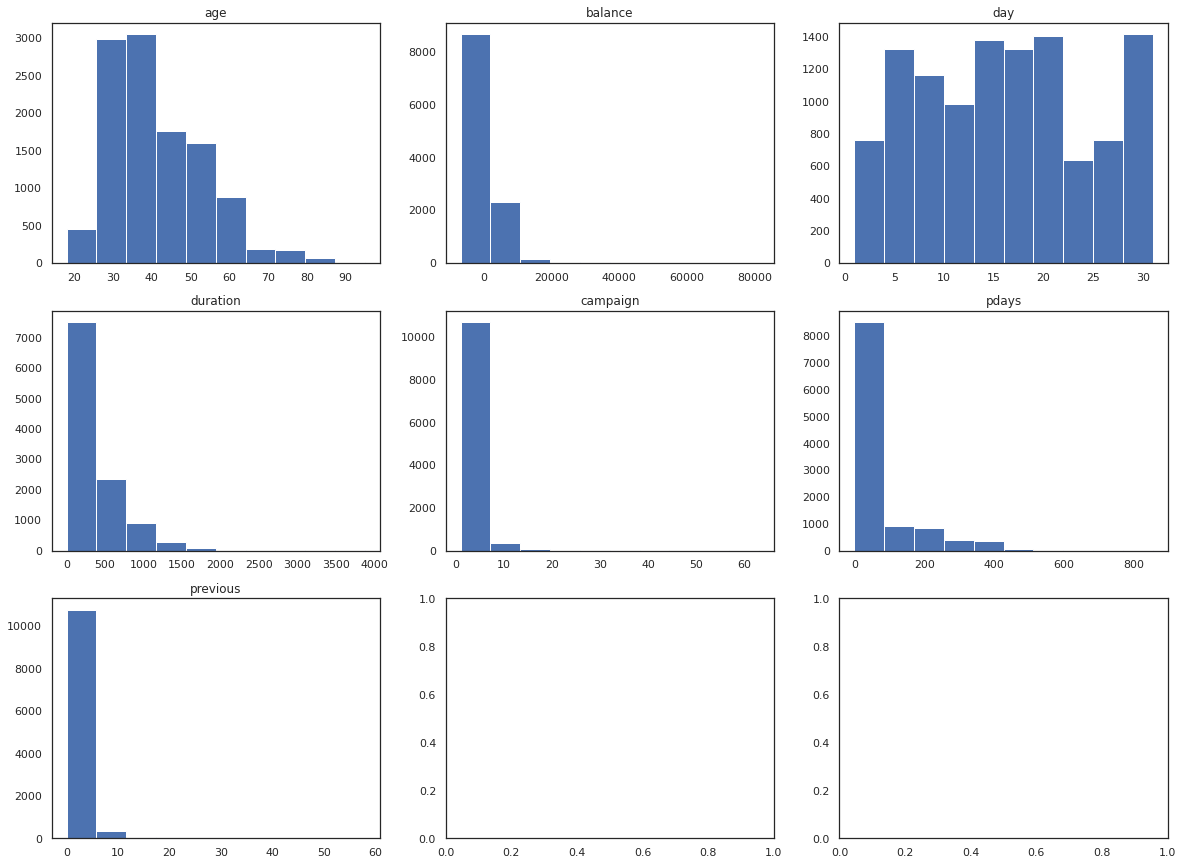

In [ ]:
#visualisation of numerical columns
num_columns = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [ ]:
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
#Encodage Onehot
d = pd.get_dummies(data, columns =["default","housing","loan","job", "marital", "education", "contact", "month", "poutcome","deposit"])
data = data.drop(columns= ["default","housing","loan","job", "marital", "education", "contact", "month", "poutcome", "deposit"],inplace=True)
data = pd.concat([data,d], axis=1)
data

,age,balance,day,duration,campaign,pdays,previous,default_no,default_yes,housing_no,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,5,1042,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,5,1467,1,-1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,5,673,2,-1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
11158,39,733,16,83,4,-1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
11159,32,29,19,156,2,-1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
11160,43,0,8,9,2,172,5,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
data

,age,balance,day,duration,campaign,pdays,previous,default_no,default_yes,housing_no,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,5,1042,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,5,1467,1,-1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,5,673,2,-1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
11158,39,733,16,83,4,-1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
11159,32,29,19,156,2,-1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
11160,43,0,8,9,2,172,5,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   default_no           11162 non-null  uint8
 8   default_yes          11162 non-null  uint8
 9   housing_no           11162 non-null  uint8
 10  housing_yes          11162 non-null  uint8
 11  loan_no              11162 non-null  uint8
 12  loan_yes             11162 non-null  uint8
 13  job_admin.           11162 non-null  uint8
 14  job_blue-collar      11162 non-null  uint8
 15  job_entrepreneur     11162 non-null  uint8
 16  job_housemaid        1

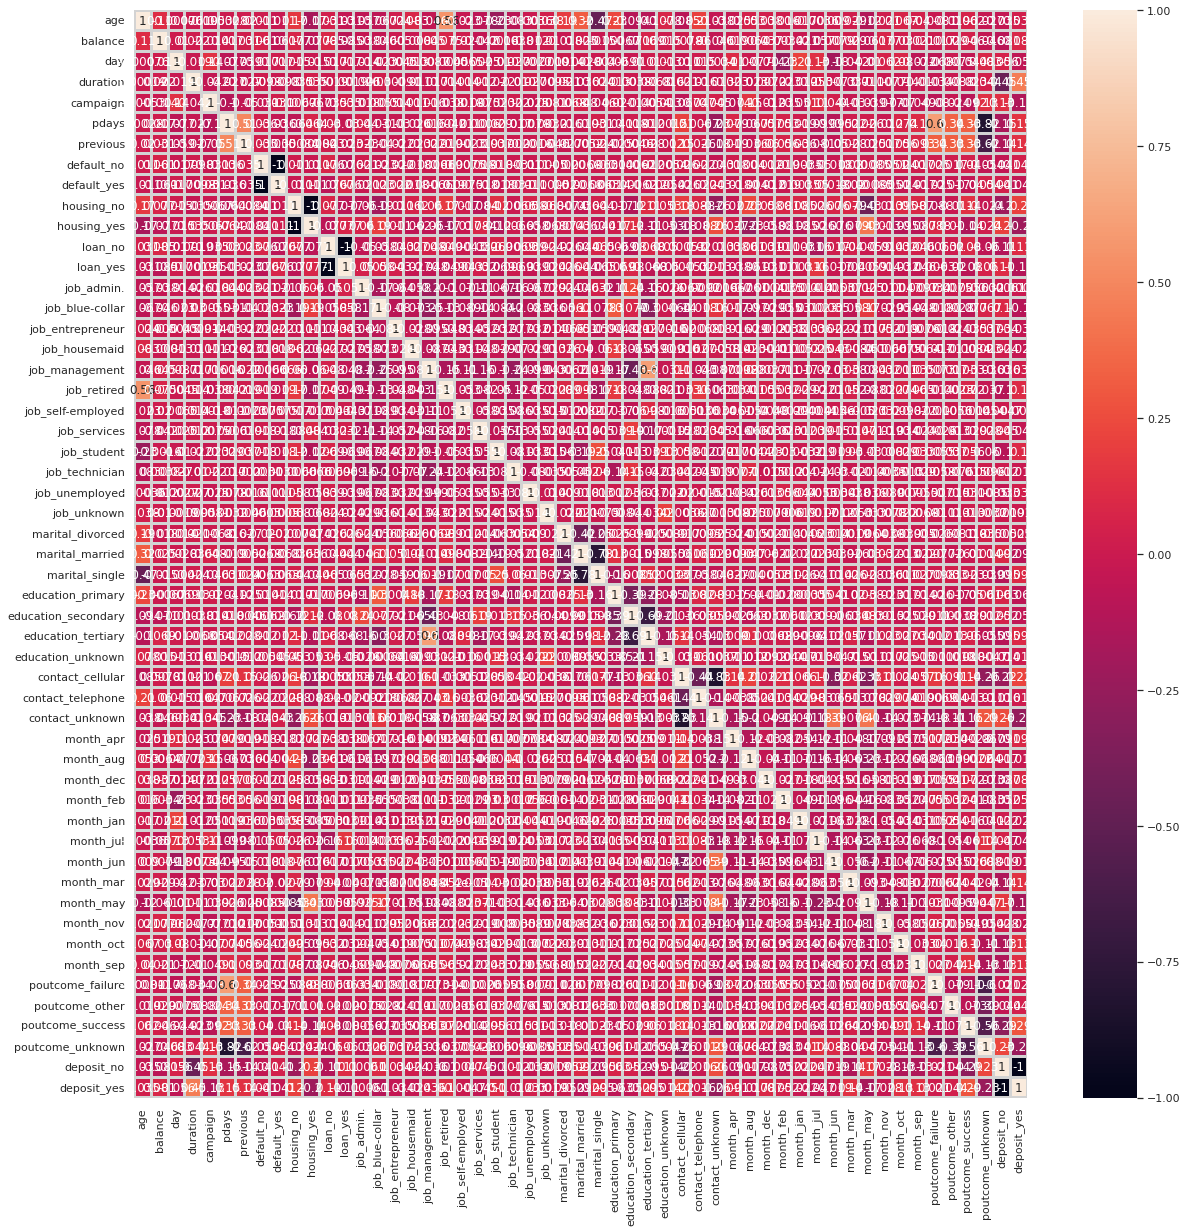

In [ ]:
plt.figure(figsize = (20, 20))# la corrélation et heatmap on ne l'utilise pas pour le traitement d'images, car les pixels sont forcément corrélés entre eux.(mais ça serait intéressant de voir visuellement heatmap d'une image) 

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

les features sont relativement indépendants

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=123)# deep learning 90-10

In [ ]:
train,validation=train_test_split(train_data, test_size=0.1, random_state=123)

In [ ]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_validation = validation.iloc[:,:-1]
y_validation = validation.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [ ]:
num_classes=2
y_train = to_categorical(y_train,num_classes)#je leur garde le même nom
y_test = to_categorical(y_test,num_classes)
y_validation = to_categorical(y_validation,num_classes)

In [ ]:
#Model
def build_model():
    model = Sequential()
    model.add(Dense(128,activation = 'relu'))
    Dropout(0.2),
    model.add(Dense(60,activation = 'relu'))
    model.add(Dense(2,activation= 'softmax'))#softmax on l'utilise pour la classification multiclasse, ici on a 2 classes
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
model = build_model()

In [ ]:
#validation_data est un paramètre préprogrammé
history_model = model.fit(X_train, y_train, 
                    epochs=400, batch_size=200,
                    validation_data=(X_validation, y_validation)) #

Epoch 1/400
36/36 [==============================] - 2s 18ms/step - loss: 13.2461 - accuracy: 0.5954 - val_loss: 3.1289 - val_accuracy: 0.6995
Epoch 2/400
36/36 [==============================] - 0s 14ms/step - loss: 3.5229 - accuracy: 0.6798 - val_loss: 4.8039 - val_accuracy: 0.6445
Epoch 3/400
36/36 [==============================] - 0s 8ms/step - loss: 3.7137 - accuracy: 0.6835 - val_loss: 1.1954 - val_accuracy: 0.7673
Epoch 4/400
36/36 [==============================] - 0s 8ms/step - loss: 3.2640 - accuracy: 0.6995 - val_loss: 2.4464 - val_accuracy: 0.7136
Epoch 5/400
36/36 [==============================] - 0s 8ms/step - loss: 2.6259 - accuracy: 0.7171 - val_loss: 1.0058 - val_accuracy: 0.7519
Epoch 6/400
36/36 [==============================] - 0s 9ms/step - loss: 2.9183 - accuracy: 0.7026 - val_loss: 4.9714 - val_accuracy: 0.6624
Epoch 7/400
36/36 [==============================] - 0s 11ms/step - loss: 3.6065 - accuracy: 0.7099 - val_loss: 1.1856 - val_accuracy: 0.7890
Epoch 8/4

**EVALUATION \ TEST**

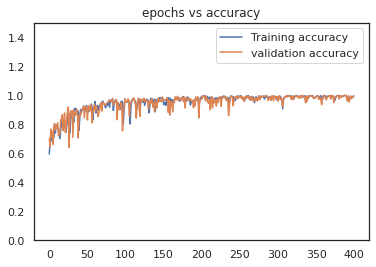

In [ ]:
train_accuracy = history_model.history['accuracy']#history_model.history[None]
val_accuracy = history_model.history['val_accuracy']#history_model.history[None]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, val_accuracy, label='validation accuracy')
plt.title('epochs vs accuracy')
plt.ylim(0.0,1.5)# pour limité l'intervalle des valeurs de l'axe des y
plt.legend()

remarque: pas de overfitting

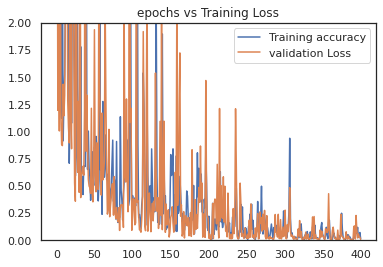

In [ ]:
train_loss = history_model.history['loss']#history_model.history[None]
val_loss = history_model.history['val_loss']#history_model.history[None]

count = range(len(train_accuracy))
plt.plot(count, train_loss, label='Training accuracy')
plt.plot(count, val_loss, label='validation Loss')
plt.title('epochs vs Training Loss')
plt.ylim(0.0,2.0)# pour limité l'intervalle des valeurs de l'axe des y
plt.legend()

In [ ]:
X_train.shape

(7031, 52)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

53/53 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9952
Test loss: 0.0153 accuracy: 0.9952


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               6784      
                                                                 
 dense_10 (Dense)            (None, 60)                7740      
                                                                 
 dense_11 (Dense)            (None, 2)                 122       
                                                                 
Total params: 14,646
Trainable params: 14,646
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([[4.4266253e-05, 9.9995577e-01],
       [9.9999249e-01, 7.4744803e-06],
       [1.7377465e-04, 9.9982625e-01],
       ...,
       [9.9997962e-01, 2.0421819e-05],
       [2.1668038e-04, 9.9978334e-01],
       [9.9998641e-01, 1.3631957e-05]], dtype=float32)

In [ ]:
y_test

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
y_test.shape

(3349, 2)

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.5)
b=binarizer.fit_transform(Y_pred)
Y_pred=b

In [ ]:
Y_pred

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
Y_pred.shape

(3349, 2)

In [ ]:
from sklearn.metrics import f1_score
score=f1_score(y_test, Y_pred, average='micro')# la précision
score

0.9952224544640191